In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering, Feature Selection
from sklearn.feature_selection import mutual_info_classif

# Missing values imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

# Model Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score, confusion_matrix

#Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Model Selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model  import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Analysis of DATASET

In [10]:
df=pd.read_csv("./bank/bank-full.csv" , sep=';')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
!pip install missingno

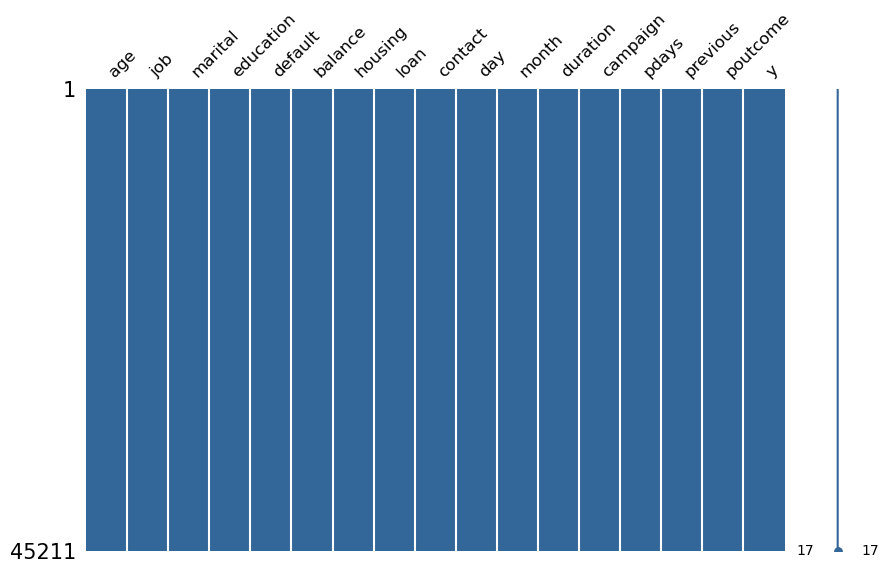

In [13]:
import missingno as msn
# Defining Parameters


# Visualize the dataset
msn.matrix(df,figsize=(10, 6),
            width_ratios=(15, 1),
            color=(0.2, 0.4, 0.6),
            fontsize=12,sparkline=True)
plt.show()  

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [16]:
#It is obvious that an unbalanced data set will cause problems...... :(((((((
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [17]:
df["previous"].value_counts()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

In [18]:
df['job'].value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job')

In [19]:
df['day'].value_counts().index

Index([20, 18, 21, 17,  6,  5, 14,  8, 28,  7, 19, 29, 15, 12, 13, 30,  9, 11,
        4, 16,  2, 27,  3, 26, 23, 22, 25, 31, 10, 24,  1],
      dtype='int64', name='day')

In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

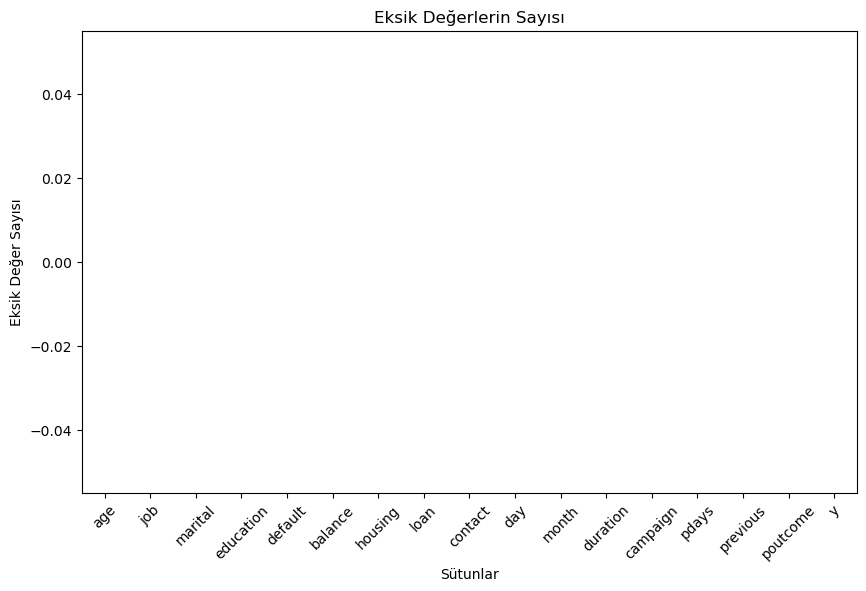

In [21]:
# Calculate the number of missing values
missing_values_count = df.isnull().sum()


# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xlabel('Sütunlar')
plt.ylabel('Eksik Değer Sayısı')
plt.title('Eksik Değerlerin Sayısı')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.duplicated().sum()

0

In [23]:
num_var = [feature for feature in df.columns if df[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                               'uint32', 'uint64','float_', 'float16', 'float32','float64']]
print('Number of numerical variables =>',len(num_var),'\nNumerical Variables=>',num_var)

Number of numerical variables => 7 
Numerical Variables=> ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [24]:
continuous_variables =[feature for feature in num_var if len(df[feature].unique()) > 25] 
print('Number of continuous variables =>',len(continuous_variables),'\nContinuous Variables=>',continuous_variables)

Number of continuous variables => 7 
Continuous Variables=> ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [25]:
discrete_variables =[feature for feature in num_var if len(df[feature].unique()) < 25] 
print('Number of discrete variables =>',len(discrete_variables),'\nDiscrete Variables=>',discrete_variables)

Number of discrete variables => 0 
Discrete Variables=> []


In [26]:
for column in df.columns:
    print('\n ==============',column,' ============== \n')
    print(df[column].unique())    



 ============== age  ============== 

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

 ============== job  ============== 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

 ============== marital  ============== 

['married' 'single' 'divorced']

 ============== education  ============== 

['tertiary' 'secondary' 'unknown' 'primary']

 ============== default  ============== 

['no' 'yes']

 ============== balance  ============== 

[ 2143    29     2 ...  8205 14204 16353]

 ============== housing  ============== 

['yes' 'no']

 ============== loan  ============== 

['no' 'yes']

 ============== contact  ============== 

['unknown' 'cellular' 'telephone']

 ============== day  ============== 

[ 5 

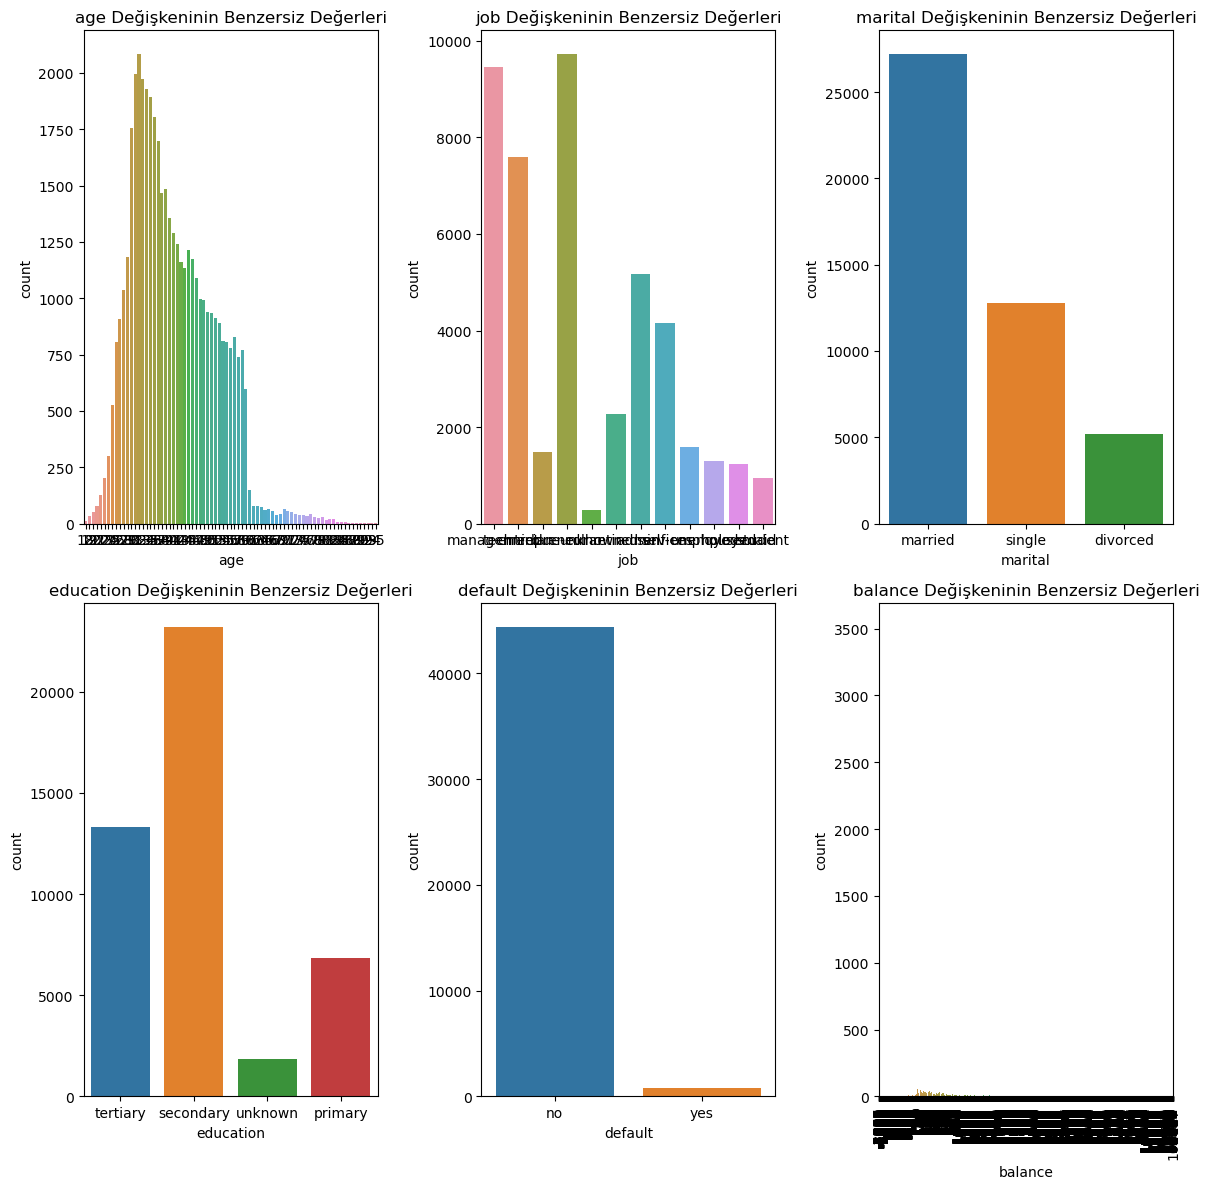

In [27]:
# Create a subgraph area containing the first 9 variables
fig, axes = plt.subplots(2, 3, figsize=(12, 12))


# Create subplots for first 9 variables
for i, column in enumerate(df.columns[:6]):
    row_index = i // 3
    col_index = i % 3
    sns.countplot(data=df, x=column, ax=axes[row_index, col_index])
    plt.xticks(rotation=90)
    axes[row_index, col_index].set_title(f'{column} Değişkeninin Benzersiz Değerleri')

plt.tight_layout()
plt.show()

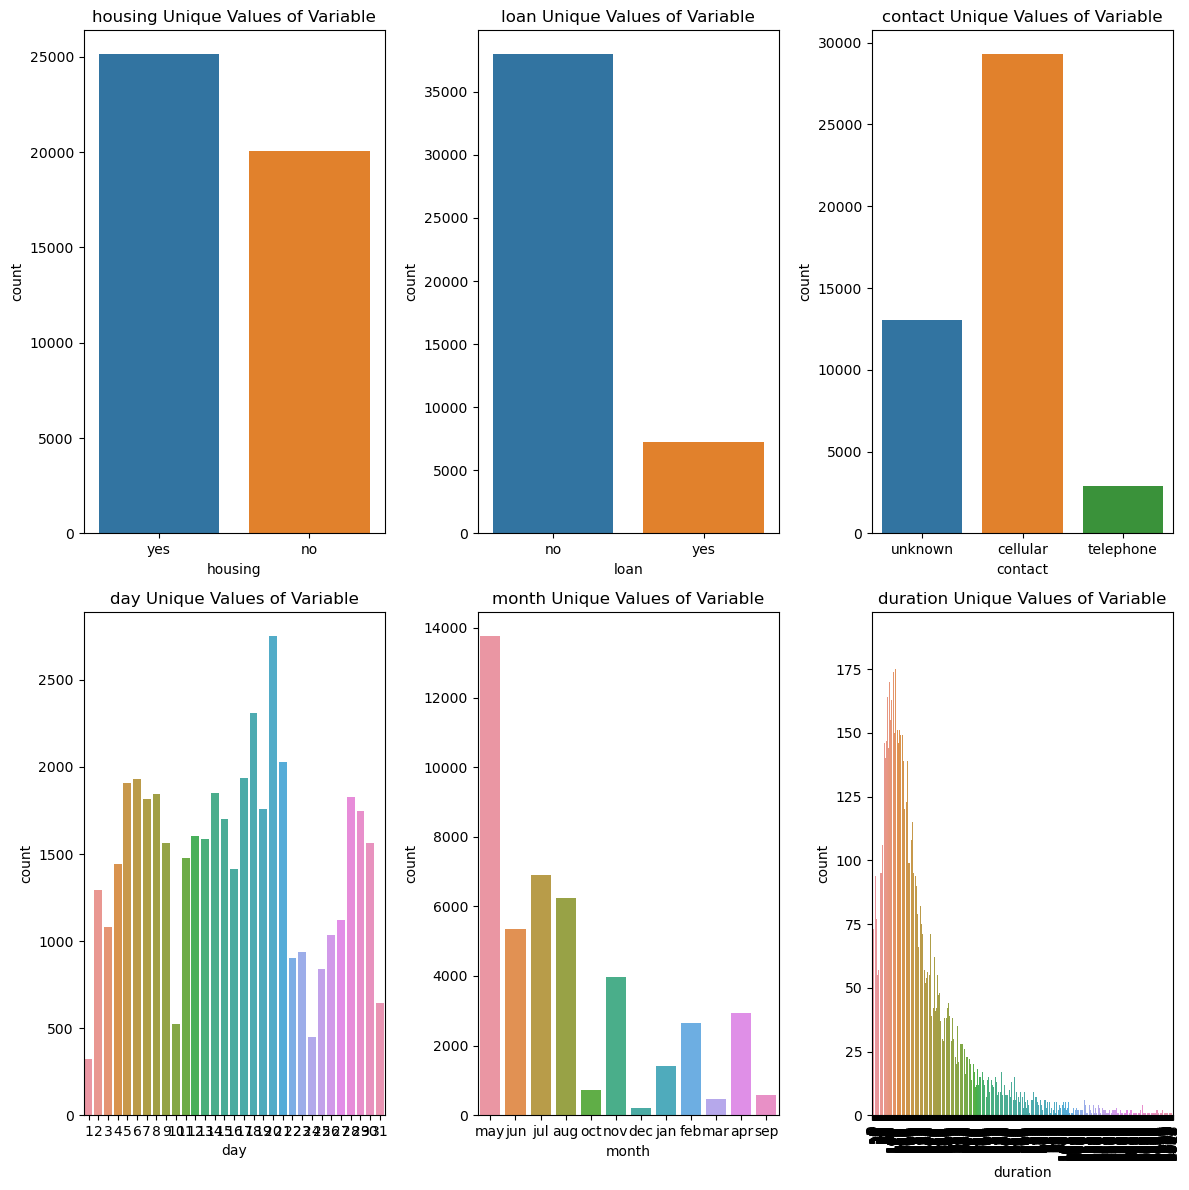

In [28]:
# Create a subplot area containing the next 8 variables
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Create subplots for next 8 variables
for i, column in enumerate(df.columns[6:12]):
    row_index = i // 3
    col_index = i % 3
    sns.countplot(data=df, x=column, ax=axes[row_index, col_index])
    plt.xticks(rotation=90)
    axes[row_index, col_index].set_title(f'{column} Unique Values ​​of Variable')

plt.tight_layout()
plt.show()

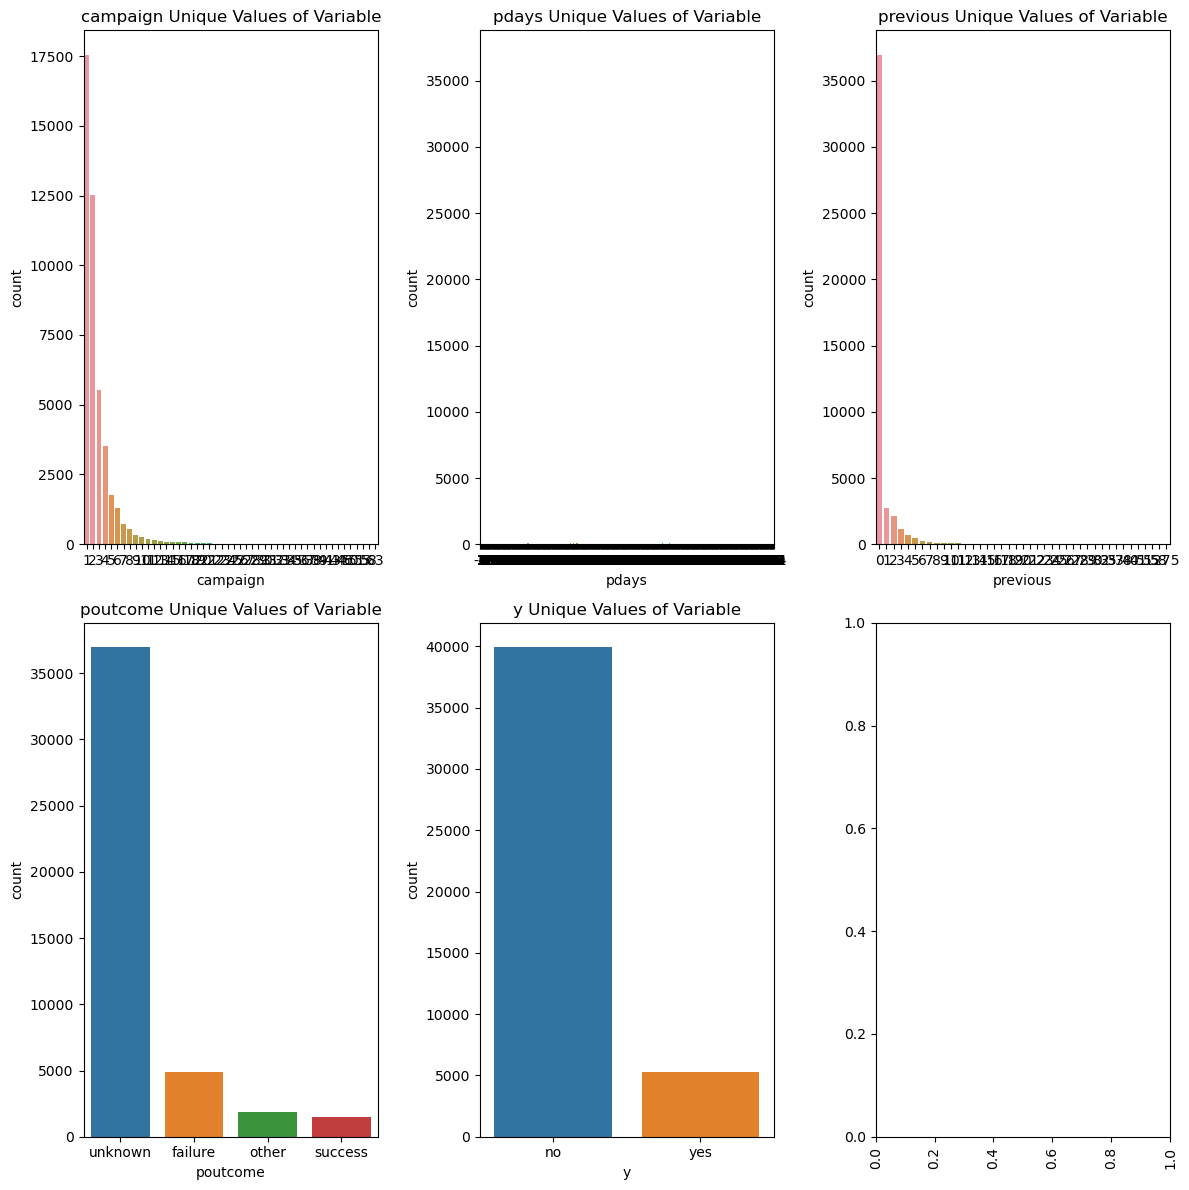

In [29]:
# Create a subplot area containing the next 8 variables
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Create subplots for next 8 variables
for i, column in enumerate(df.columns[12:17]):
    row_index = i // 3
    col_index = i % 3
    sns.countplot(data=df, x=column, ax=axes[row_index, col_index])
    plt.xticks(rotation=90)
    axes[row_index, col_index].set_title(f'{column} Unique Values ​​of Variable')

plt.tight_layout()
plt.show()

In [30]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [31]:
# Calculate the count of 'unknown' and 'other' in the 'poutcome' column
unknown_poutcome = (df['poutcome'] == 'unknown').sum()
other_poutcome = (df['poutcome'] == 'other').sum()


# Calculate the total count of values in the 'poutcome' column
total_poutcome = len(df)

# Calculate the percentage of 'unknown' and 'other'
percentage_unknown_poutcome = (unknown_poutcome / total_poutcome) * 100
percentage_other_poutcome = (other_poutcome / total_poutcome) * 100

print("Percentage of 'unknown' in poutcome:", percentage_unknown_poutcome)
print("Percentage of 'other' in poutcome:", percentage_other_poutcome)

Percentage of 'unknown' in poutcome: 81.74780473778506
Percentage of 'other' in poutcome: 4.06980602065869


In [32]:
# There are no missing values ​​in this data set. But helpless like lost values
# There are also remaining values ​​such as “unknown” and “others”.
# Thus, these unknown values ​​must be removed from the data set.
df.drop(columns=['poutcome'], axis=1 , inplace=True)

In [33]:
df[df["contact"] != "unknown"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,no
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,no


In [34]:
# Calculate the count of 'unknown' and 'other' in the 'contact' column
unknown_contact = (df['contact'] == 'unknown').sum()


# Calculate the total count of values in the 'contact' column
total_contact = len(df)

# Calculate the percentage of 'unknown' and 'other'
percentage_unknown_contact = (unknown_contact / total_contact) * 100

print("Percentage of 'unknown' in contact:", percentage_unknown_contact)

Percentage of 'unknown' in contact: 28.798301298356595


In [35]:
#Analyzing "unknown" values ​​in #dfFrame
#ve is to determine the columns and rows with the highest percentage of "unknown" values.

def calculate_unknown_percentages(df):

  # Calculate the number of "unknown" values ​​in each column
  unknown_counts = (df == 'unknown').sum()
  total_counts = len(df)
  unknown_percentages = (unknown_counts / total_counts) * 100

  # Convert unknown_percentages to a Series for use with idxmaxr
  unknown_percentages = unknown_percentages.reset_index(drop=True)

  # Calculate the percentage of "unknown" values ​​in each row
  unknown_percentages_in_rows = (df == 'unknown').mean(axis=1) * 100

  return unknown_percentages, unknown_percentages_in_rows



# Calculate unknown value percentages and find columns and rows with the highest percentages
unknown_percentages, unknown_percentages_in_rows = calculate_unknown_percentages(df)

highest_column_index = unknown_percentages.idxmax()
highest_column_percentage = unknown_percentages.max()

highest_row_index = unknown_percentages_in_rows.idxmax()
highest_row_percentage = unknown_percentages_in_rows.max()

print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {highest_column_index}, Percentage: {highest_column_percentage:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {highest_row_index}, Percentage: {highest_row_percentage:.2f}%")

Percentage of 'unknown' values in each column:
0      0.000000
1      0.637013
2      0.000000
3      4.107407
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8     28.798301
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0         6.25
1         6.25
2         6.25
3        12.50
4        18.75
         ...  
45206     0.00
45207     0.00
45208     0.00
45209     0.00
45210     0.00
Length: 45211, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: 8, Percentage: 28.80%

Row with the highest percentage of 'unknown' values:
Row: 4, Percentage: 18.75%


In [36]:
#4. If all values ​​in the row are "unknown": We deleted this row because it does not contain meaningful information for the dataset.
#since The data in line 4 did not contain enough information for analysis, so we deleted it to simplify the analysis.
df=df.drop(4)

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no


In [38]:
df[df["day"]==7]["duration"].unique()

array([  89,   51,  169,  148,  132,  117,  275,  124,  118,  479,  285,
         35,  322,  202,  172,  201,  216,  195,   96,  720,  188,   70,
        141,  106,  395,  629,  502,  446,  241,  131,  312,  120,  333,
        113,   91,  128,  200,  326,  292,   68,  215,   97,   32,  162,
        152,  268,  104,  852,  923,  159,  953,  416,  174,  180,  139,
        294,  102,  130,  143,   74,  105,  477,  158,  250,  168,  520,
        171,  254,  149,  133,  293,  485,  374,  425,  207,   83,  228,
        732,  142,  359,  112, 1521,  161,  122,  800,  615,  111,  354,
        327,  236,  160,  184,  227,  109,  492,  298,  204, 1138,  123,
        125,  295,  287,  140,  233,  193,  126,  230,  591,  173,  336,
         19,  153,  786,   99,  243,  260,  164,  255,   47,  463,  192,
        388,  221,  175,  256,  283,  448,  127,  378,   67,  150,  144,
        296,  401,  435,  245,  223,  423,  231,  634,  107,   69,  799,
        444,  246,  259,  566,  274,   49,  380,  1

In [39]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

# HANDLING OUTLIER

<Axes: >

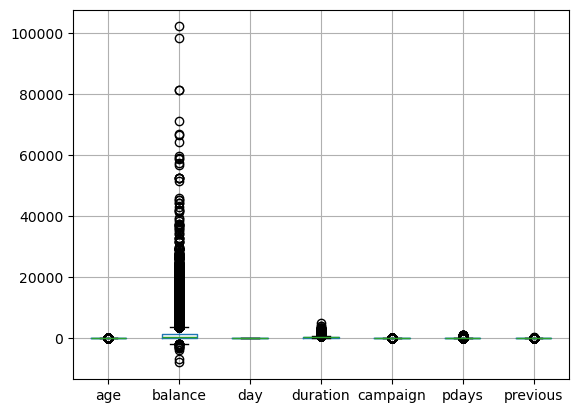

In [40]:
df.boxplot()

age            Axes(0.125,0.712609;0.227941x0.167391)
balance     Axes(0.398529,0.712609;0.227941x0.167391)
day         Axes(0.672059,0.712609;0.227941x0.167391)
duration       Axes(0.125,0.511739;0.227941x0.167391)
campaign    Axes(0.398529,0.511739;0.227941x0.167391)
pdays       Axes(0.672059,0.511739;0.227941x0.167391)
previous        Axes(0.125,0.31087;0.227941x0.167391)
dtype: object

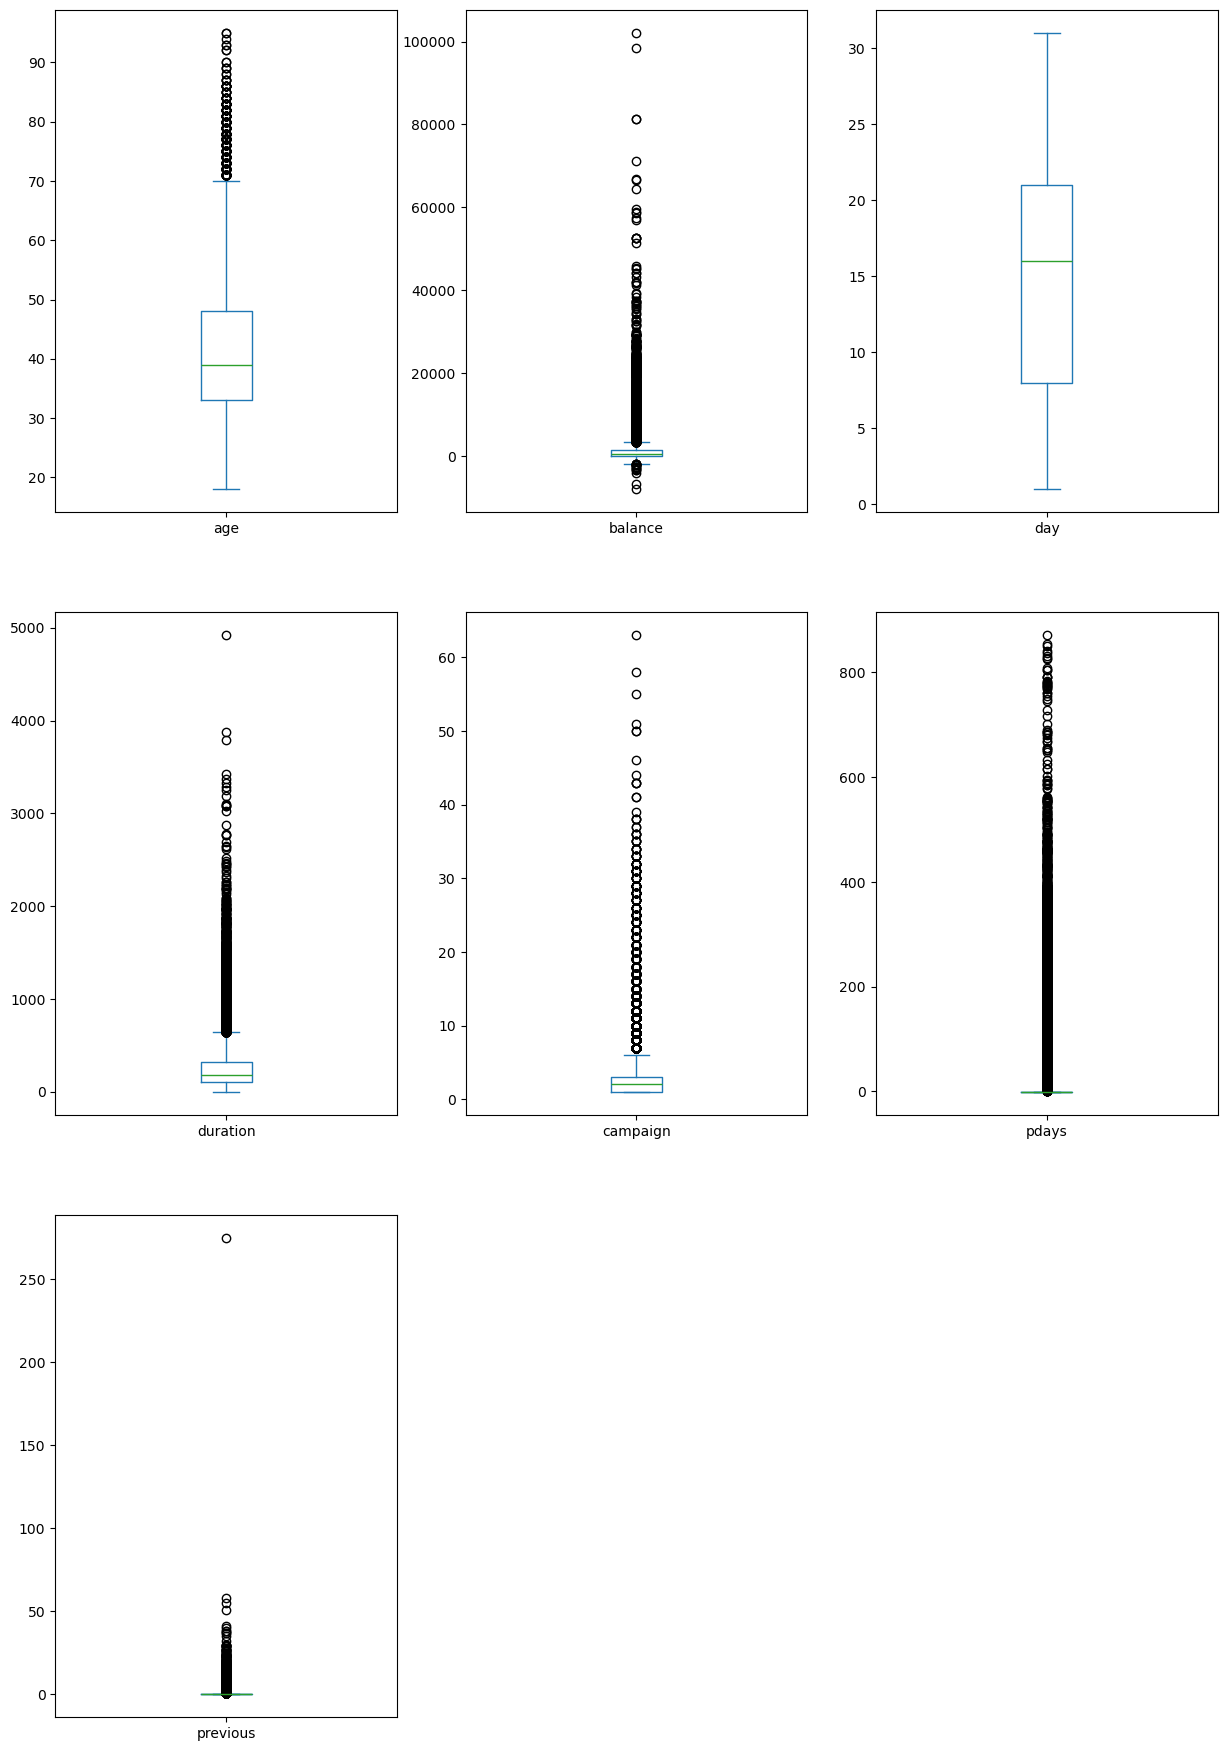

In [41]:
df.plot(kind="box", subplots=True, figsize=(15,30), layout=(4, 3))

In [42]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bridge = Q1 - 1.5 * IQR
upper_bridge = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['balance'] < lower_bridge) | (df['balance'] > upper_bridge)]
df = df[(df['balance'] >= lower_bridge) & (df['balance'] <= upper_bridge)]

In [43]:
Q1 = df['campaign'].quantile(0.10)
Q3 = df['campaign'].quantile(0.90)
IQR = Q3 - Q1

lower_bridge = Q1 - 1.5 * IQR
upper_bridge = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['campaign'] < lower_bridge) | (df['campaign'] > upper_bridge)]
df = df[(df['campaign'] >= lower_bridge) & (df['campaign'] <= upper_bridge)]

In [44]:
Q1 = df['duration'].quantile(0.20)
Q3 = df['duration'].quantile(0.80)
IQR = Q3 - Q1

lower_bridge = Q1 - 1.5 * IQR
upper_bridge = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['duration'] < lower_bridge) | (df['duration'] > upper_bridge)]
df = df[(df['duration'] >= lower_bridge) & (df['duration'] <= upper_bridge)]

In [45]:
Q1 = df['previous'].quantile(0.05)
Q3 = df['previous'].quantile(0.95)
IQR = Q3 - Q1

lower_bridge = Q1 - 1.5 * IQR
upper_bridge = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['previous'] < lower_bridge) | (df['previous'] > upper_bridge)]
df = df[(df['previous'] >= lower_bridge) & (df['previous'] <= upper_bridge)]

In [46]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bridge = Q1 - 1.5 * IQR
upper_bridge = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bridge) | (df['age'] > upper_bridge)]
df = df[(df['age'] >= lower_bridge) & (df['age'] <= upper_bridge)]

age            Axes(0.125,0.712609;0.227941x0.167391)
balance     Axes(0.398529,0.712609;0.227941x0.167391)
day         Axes(0.672059,0.712609;0.227941x0.167391)
duration       Axes(0.125,0.511739;0.227941x0.167391)
campaign    Axes(0.398529,0.511739;0.227941x0.167391)
pdays       Axes(0.672059,0.511739;0.227941x0.167391)
previous        Axes(0.125,0.31087;0.227941x0.167391)
dtype: object

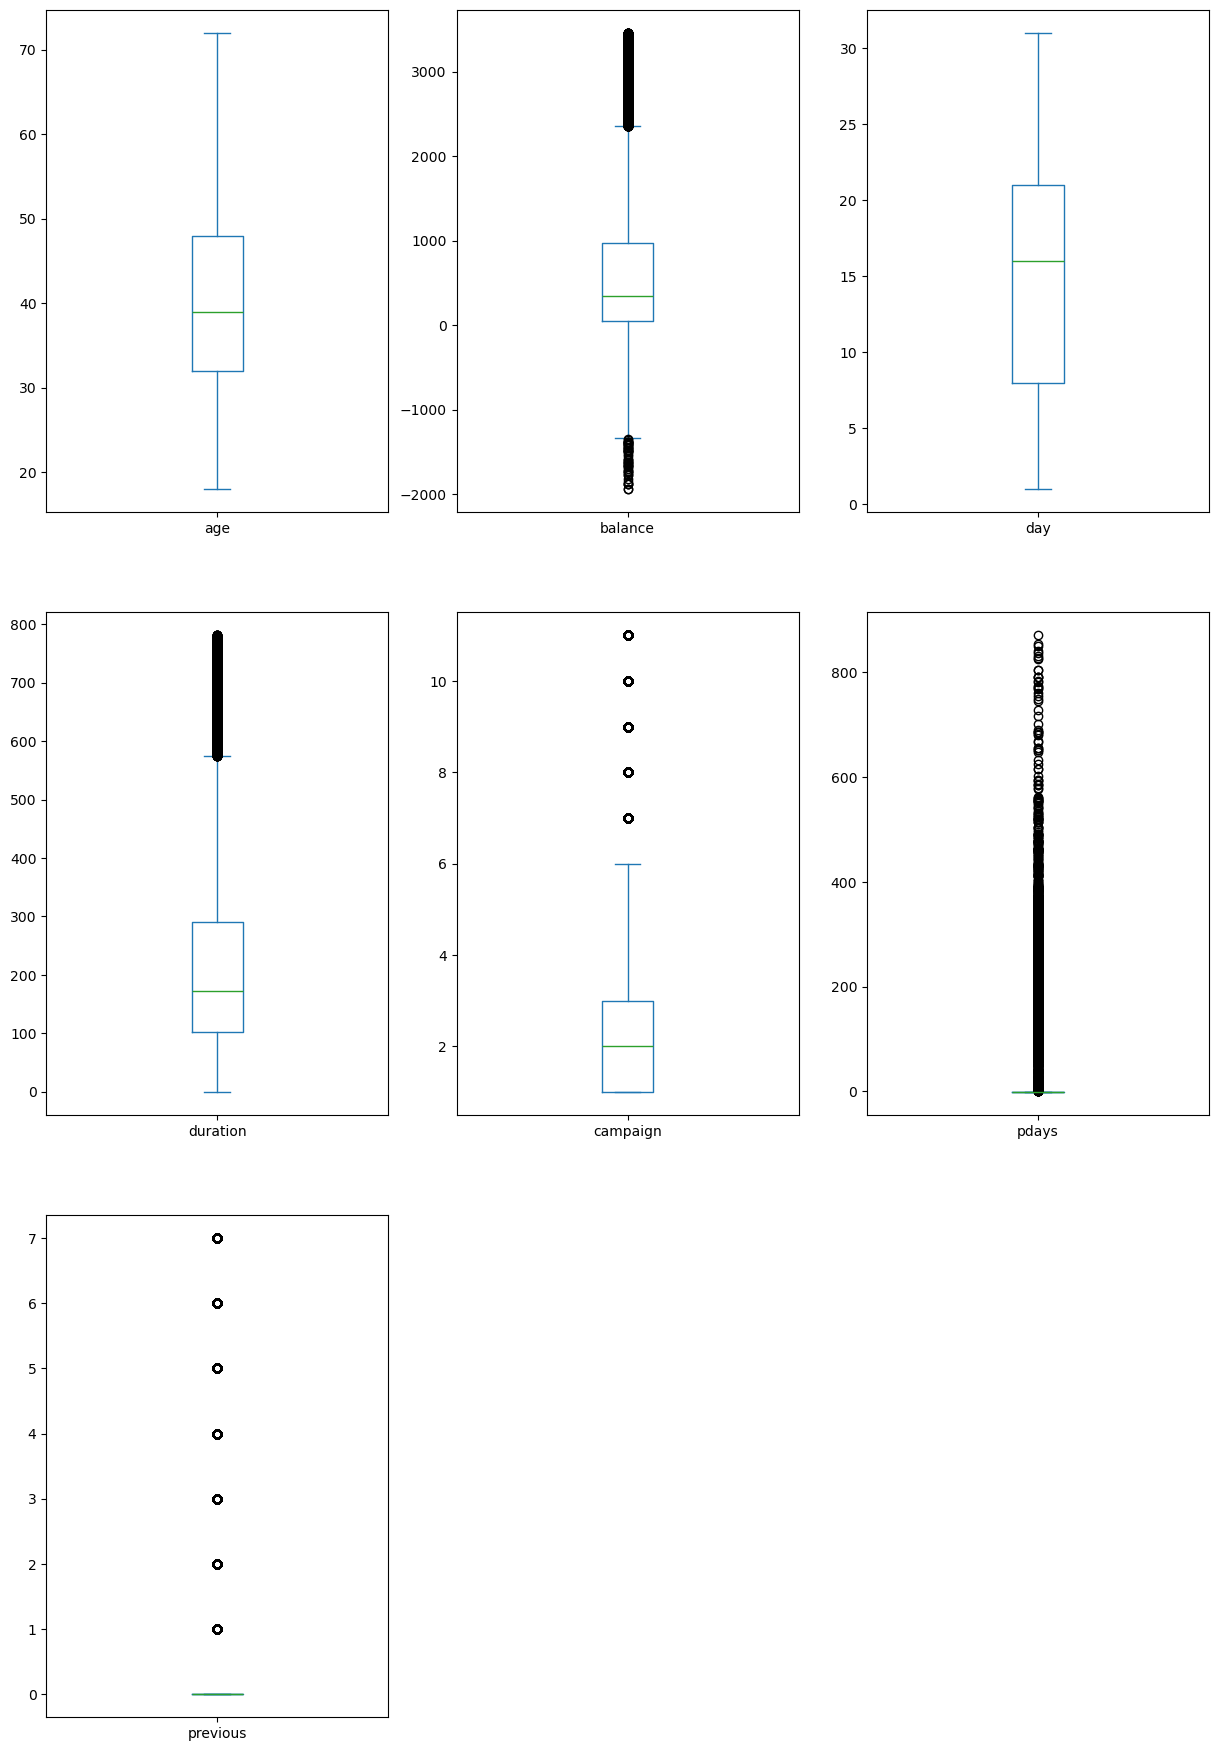

In [47]:
df.plot(kind="box", subplots=True, figsize=(15,30), layout=(4, 3))

<Axes: >

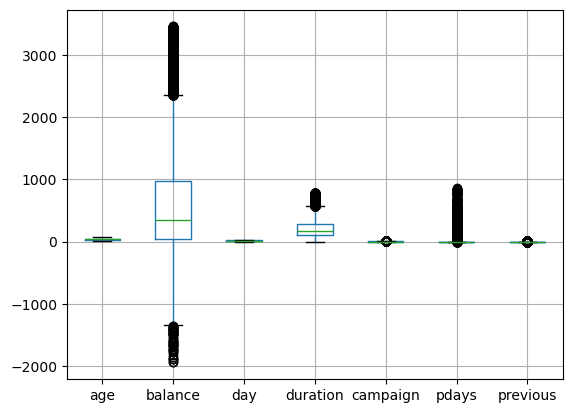

In [48]:
df.boxplot()

In [49]:
df["previous"].value_counts().sum()

37058

In [50]:
df["previous"].value_counts()

previous
0    30662
1     2334
2     1752
3      937
4      590
5      385
6      230
7      168
Name: count, dtype: int64

In [51]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes


# Determining The Relations Between Dependent Variables and Independent Variable

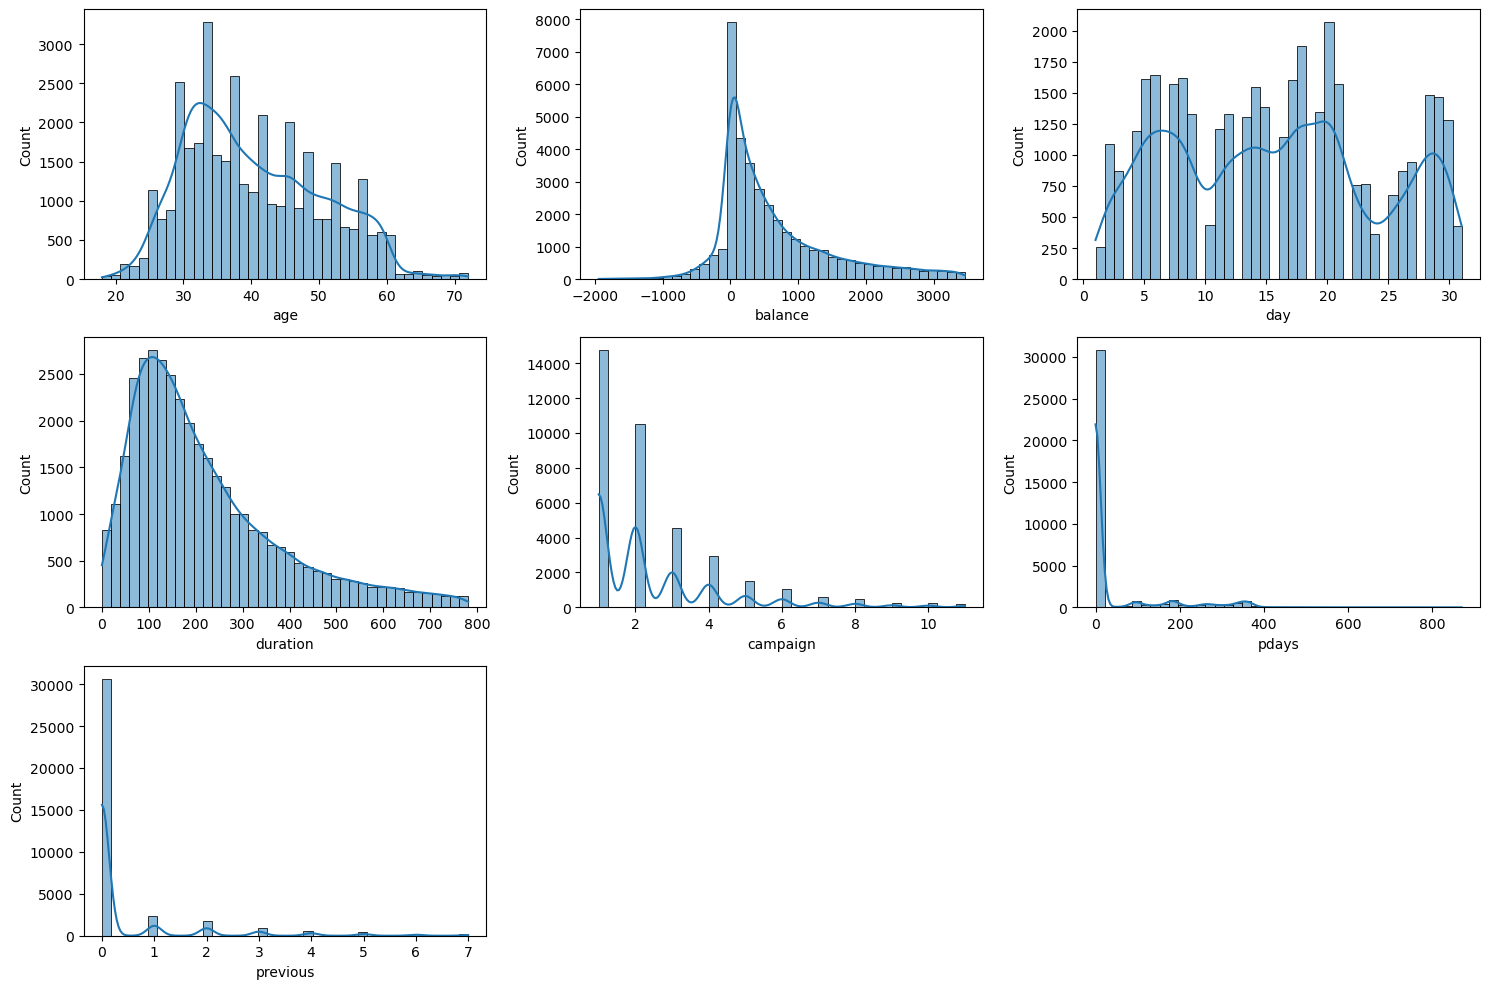

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drawing histograms of variables as subplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_var):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], bins=40, kde=True)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [53]:
df["day"].info

<bound method Series.info of 0         5
1         5
2         5
3         5
5         5
         ..
45202    17
45203    17
45205    17
45207    17
45209    17
Name: day, Length: 37058, dtype: int64>

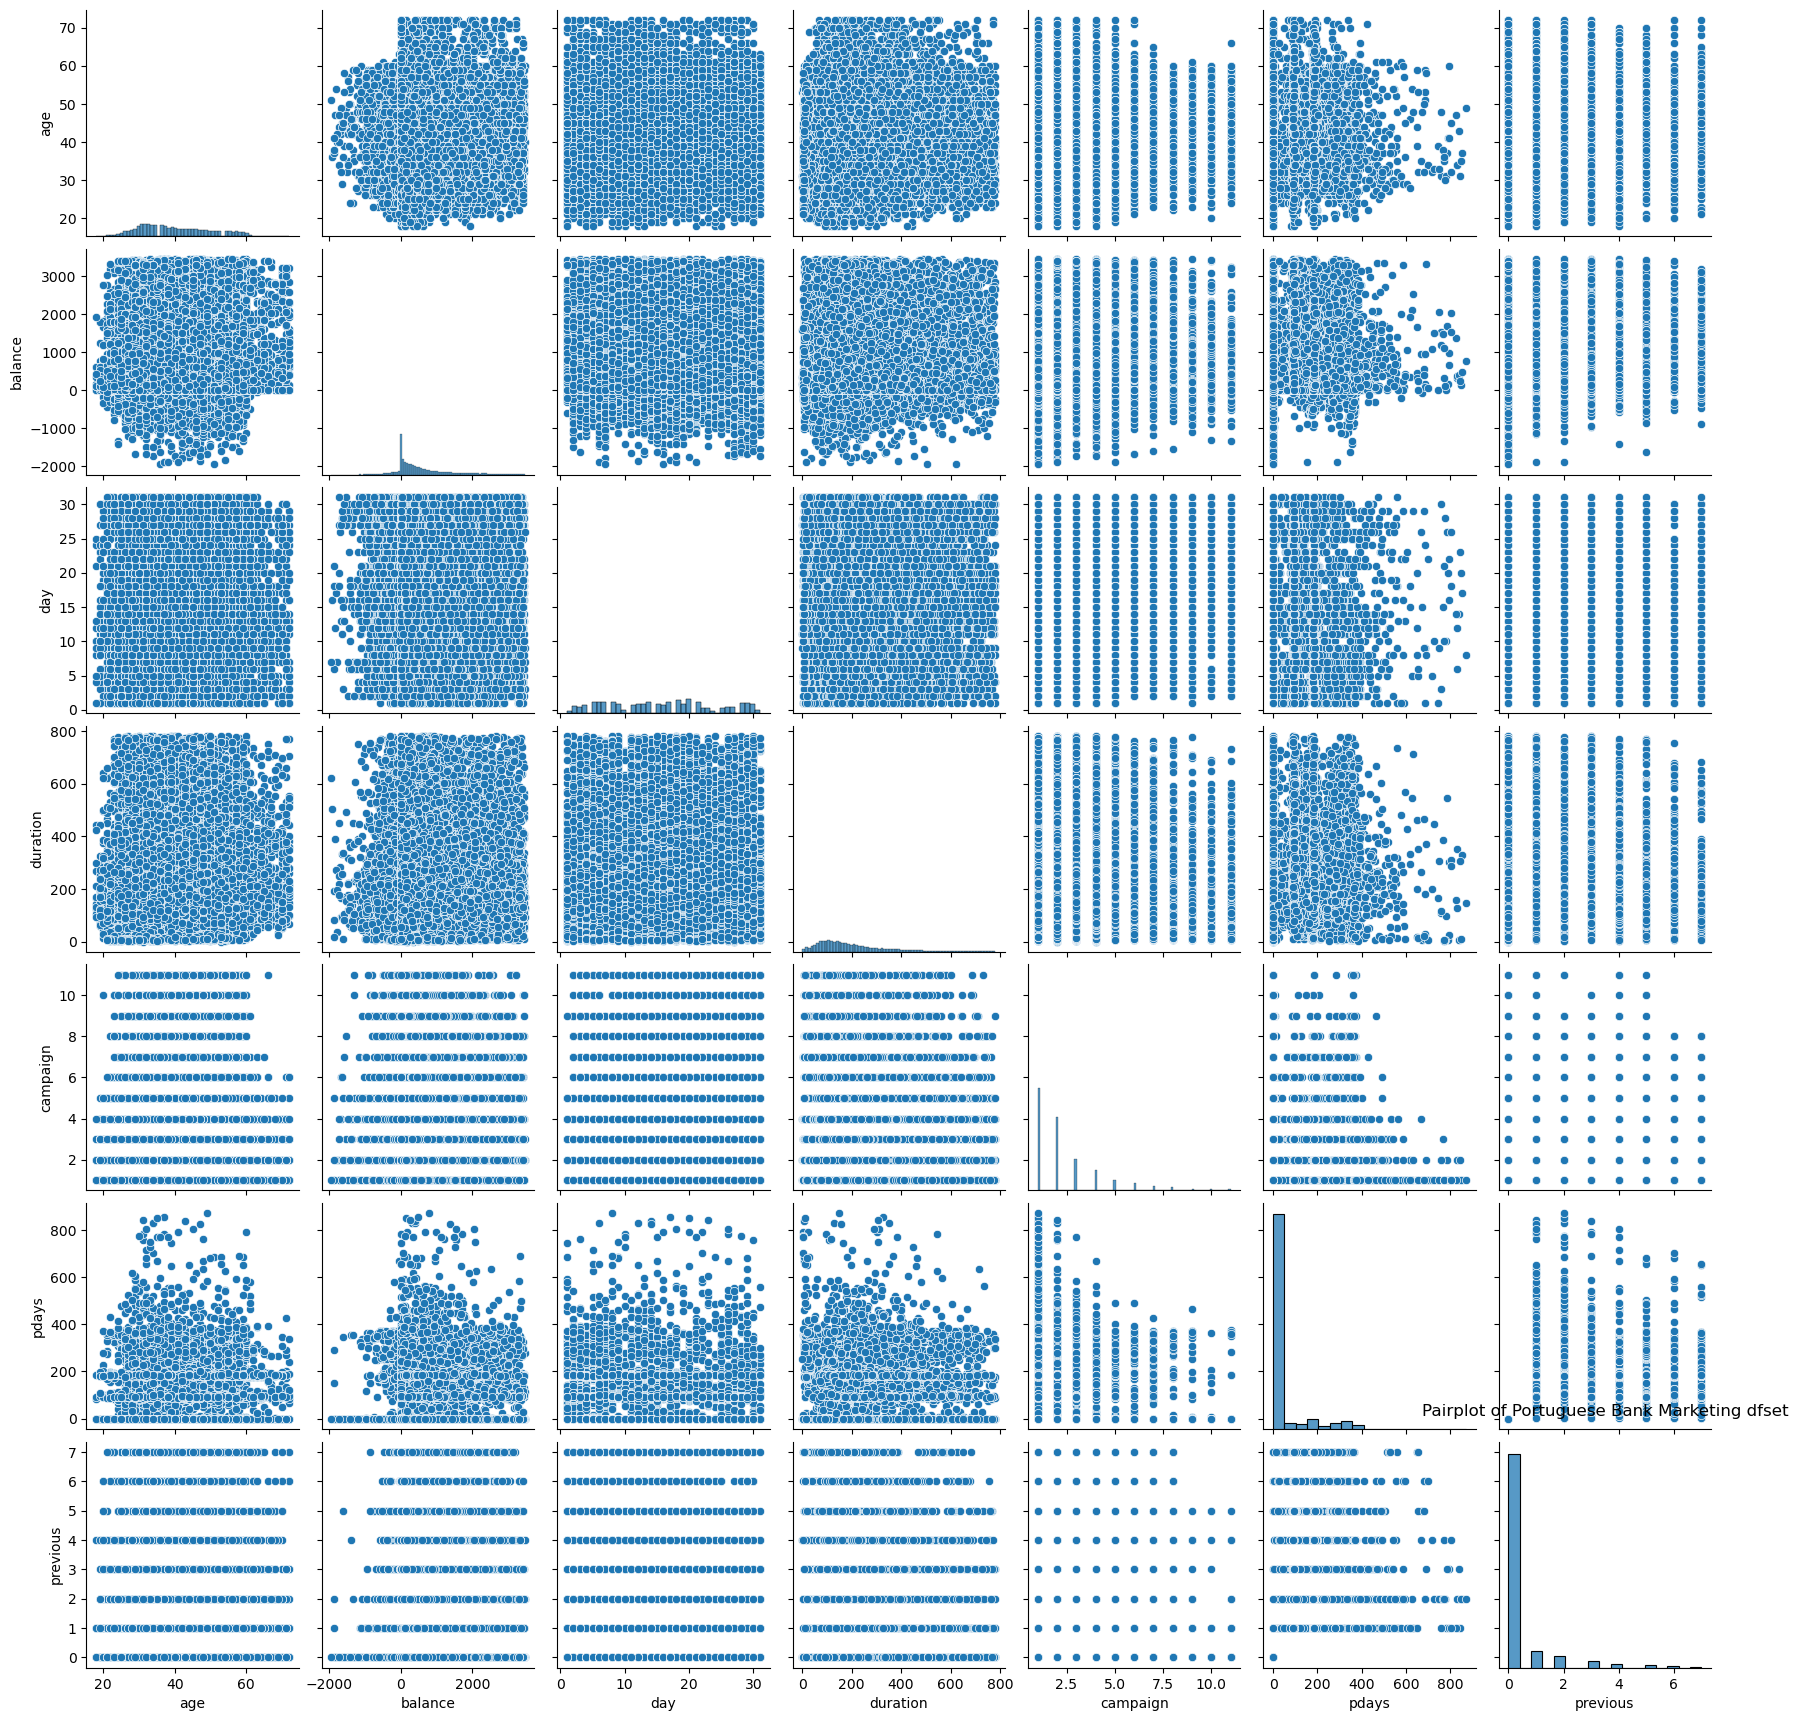

In [54]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
# Creating a correlation matrix
correlation_matrix = numeric_df.corr()

# Visualizing relationships between all variables (pairplot)
sns.pairplot(df)
plt.title("Pairplot of Portuguese Bank Marketing dfset\n")
plt.show()

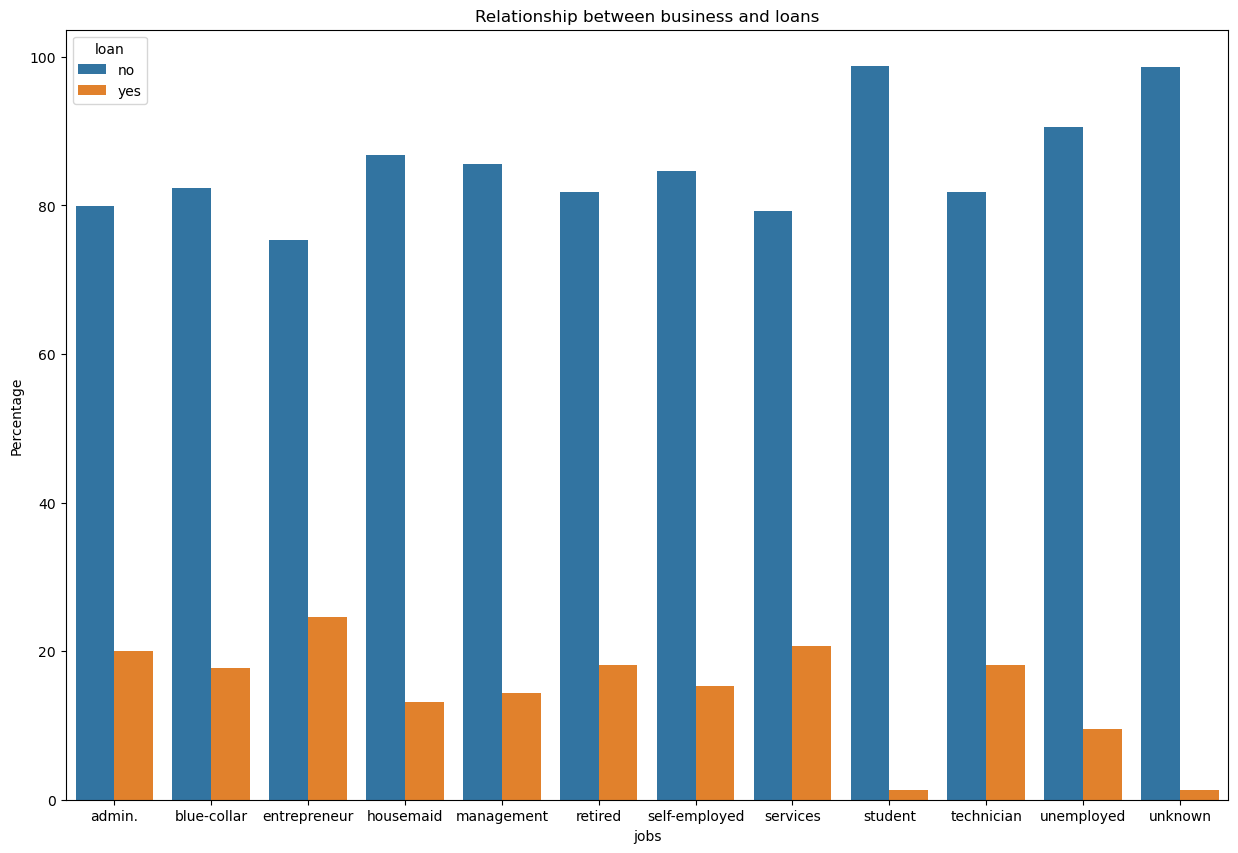

In [55]:
#How does work affect credit?

#Students are less likely to take out personal loans, while entrepreneurs, technicians and managers are
#technical and commercial jobs often have personal loans.


plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = df.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the df
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("Relationship between business and loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

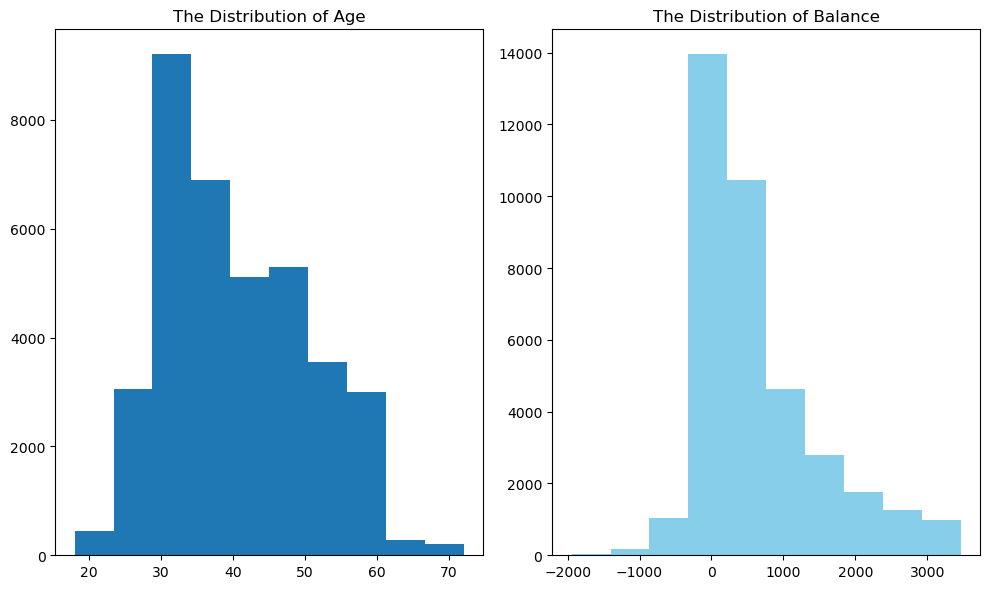

In [56]:
#Age distribution: The customers the bank calls in telemarketing campaigns have a wide age range between 18 and 95 years old.
#However, the majority of customers sought are in their 30s and 40s (ages 33 to 48 fall in the 25th to 75th percentile).
#The distribution of customer age is fairly normal with a small standard deviation.

#Balance distribution: After dropping outliers in Balance, the balance range is still very large;
#We see that the balance distribution has a large standard deviation relative to the mean,
#This shows that there is great variability in customers' balance levels.

dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

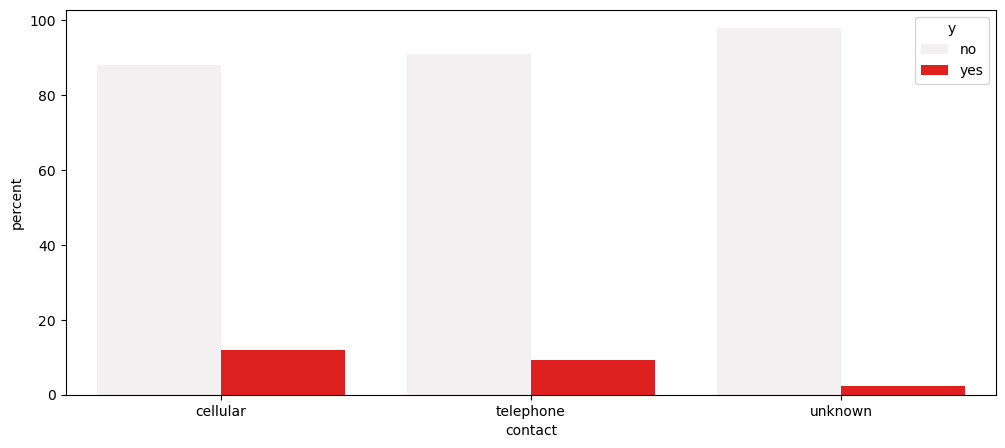

In [57]:
# Which communication method is more effective in convincing customers to subscribe?

#Cellular network is often more advantageous in terms of convincing customers to subscribe to term deposits

plt.figure(figsize=(12,5))
# Calculate the percentages
df_percentages = df.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages, color='red')

plt.show()

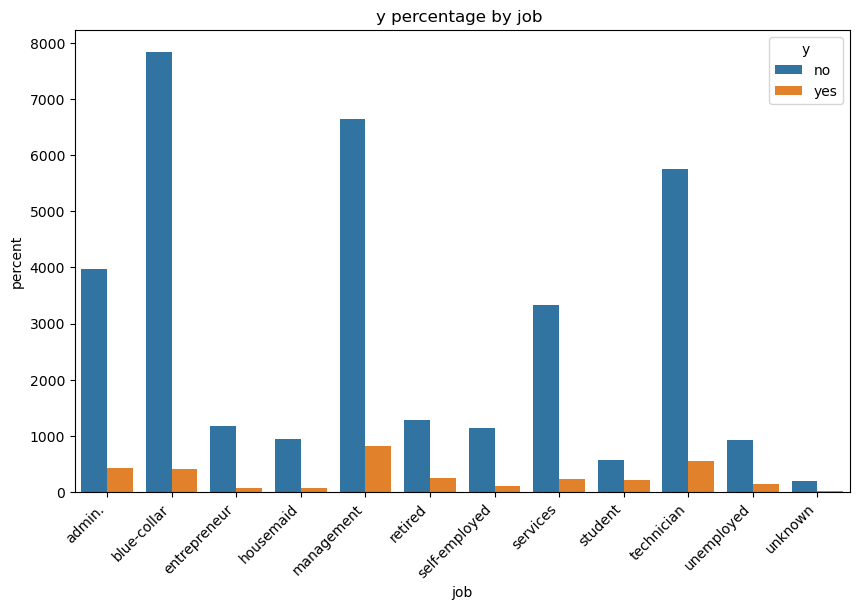

In [58]:
#How does work affect y?

# Students are much more likely to subscribe to term deposits than in other fields

colors = ['#FFB90F', '#33FFA8']
grouped = df.groupby('job')['y'].value_counts().rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('y percentage by job ')
plt.show()

In [59]:
housing_y_freq = df.groupby('housing')['y'].value_counts()
housing_y_freq 

housing  y  
no       no     13813
         yes     2214
yes      no     19946
         yes     1085
Name: count, dtype: int64

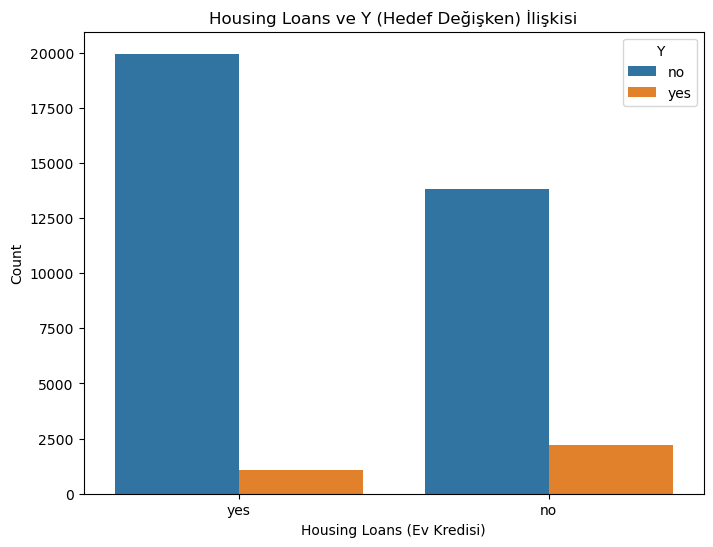

In [60]:
#Tendency of those with and without a home loan to take deposits
#Housing appears to have a certain effect on the target variable (y).
#Customers without a home loan are more likely to receive deposits, while customers with a home loan are less likely to receive deposits.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='housing', hue='y')
plt.xlabel('Housing Loans (Ev Kredisi)')
plt.ylabel('Count')
plt.title('Housing Loans ve Y (Hedef Değişken) İlişkisi')
plt.legend(title='Y', loc='upper right')
plt.show()

# One Hot Encoding , Standardization and Ajdusting Dataset

before sampling
Percentage of 'yes' in 'y': 8.902261320092828
Percentage of 'no' in 'y': 91.09773867990717


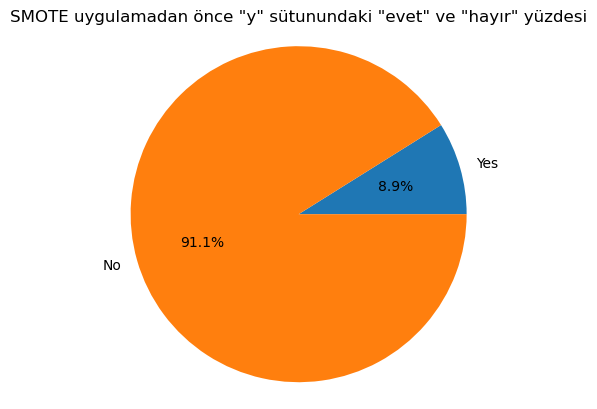

In [67]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (df['y'] == 'yes').sum()
no_count = (df['y'] == 'no').sum()

# Calculate the total count of values in the 'y' column
total_count = len(df)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("before sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)

# Create a pie chart
labels = ['Yes', 'No']
sizes = [percentage_yes, percentage_no]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('SMOTE uygulamadan önce "y" sütunundaki "evet" ve "hayır" yüzdesi')
plt.show()

In [68]:
cat_cols = [i for i in df.columns if df[i].dtype in ["category", "object"] and i != 'y']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [69]:
df_ohe = pd.get_dummies(df, drop_first=True, dtype=np.int64 ,columns= cat_cols )
df_ohe

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,35,231,5,139,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,557,17,224,1,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45203,23,113,17,266,1,-1,0,yes,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45205,25,505,17,386,2,-1,0,yes,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
X_train = df_ohe.drop(columns=['y'], axis=1)
y_train = df_ohe['y']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble  import RandomForestRegressor
rf_fe_imp = RandomForestRegressor(n_estimators = 500,n_jobs=-1)
rf_fe_imp.fit(X_train,y_train)

feature_importances = pd.DataFrame(zip(X_train.columns,rf_fe_imp.feature_importances_),columns=['Özellikler','Önem Yüzdeliği']).sort_values(by='Önem Yüzdeliği',ascending=False)
feature_importances

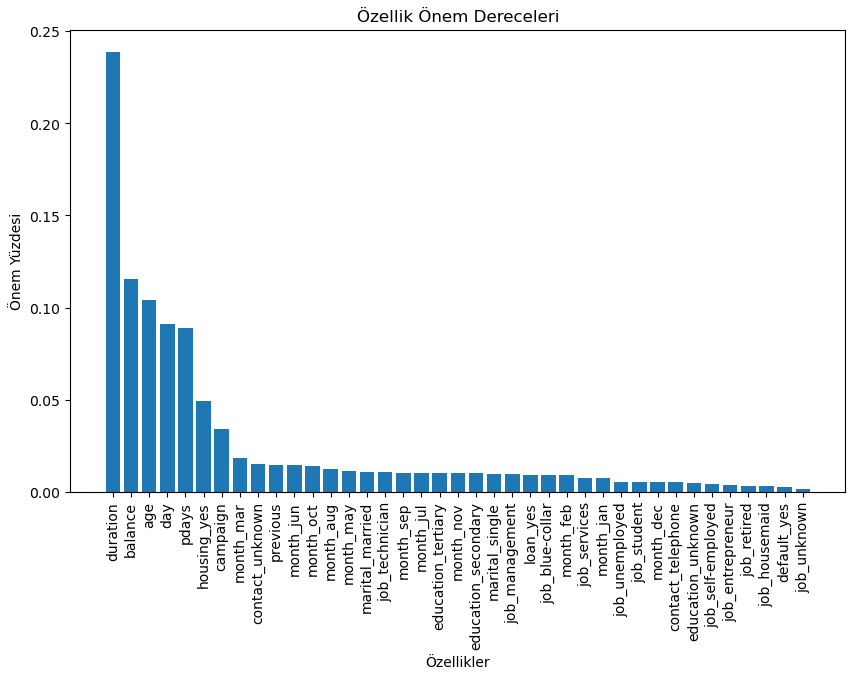

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Özellikler'], feature_importances['Önem Yüzdeliği'])
plt.xlabel('Özellikler')
plt.ylabel('Önem Yüzdesi')
plt.title('Özellik Önem Dereceleri')
plt.xticks(rotation=90)
plt.show()

In [73]:
def standardization(dataframe, variable):
    ss = StandardScaler()
    dataframe[variable] = ss.fit_transform(dataframe[variable])

cols = [i for i in df_ohe.columns if i != "y"]

In [74]:
standardization(df_ohe, cols)

In [75]:
df_ohe.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.765499,1.794834,-1.277787,0.266201,-0.762211,-0.399634,-0.371646,no,-0.535060,-0.186141,-0.167131,1.990537,-0.208156,-0.186993,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,-1.055451,1.590916,-0.203886,-0.143136,0.872964,-0.453095,-0.246516,1.534067,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,-0.360301,-0.097505,1.454541,-0.288696,-0.119181,-0.106551
1,0.363636,-0.719876,-1.277787,-0.419770,-0.762211,-0.399634,-0.371646,no,-0.535060,-0.186141,-0.167131,-0.502377,-0.208156,-0.186993,-0.326049,-0.147206,2.211479,-0.171348,-0.077279,-1.220226,1.582289,0.947463,-0.628569,-0.203886,-0.143136,0.872964,-0.453095,-0.246516,1.534067,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,-0.360301,-0.097505,1.454541,-0.288696,-0.119181,-0.106551
2,-0.737828,-0.751994,-1.277787,-0.887478,-0.762211,-0.399634,-0.371646,no,-0.535060,5.372281,-0.167131,-0.502377,-0.208156,-0.186993,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,0.947463,-0.628569,-0.203886,-0.143136,0.872964,2.207043,-0.246516,1.534067,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,-0.360301,-0.097505,1.454541,-0.288696,-0.119181,-0.106551
3,0.664035,1.037090,-1.277787,-0.787701,-0.762211,-0.399634,-0.371646,no,1.868948,-0.186141,-0.167131,-0.502377,-0.208156,-0.186993,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,-1.055451,-0.628569,4.904704,-0.143136,0.872964,-0.453095,-0.246516,1.534067,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,-0.360301,-0.097505,1.454541,-0.288696,-0.119181,-0.106551
5,-0.537562,-0.479587,-1.277787,-0.494604,-0.762211,-0.399634,-0.371646,no,-0.535060,-0.186141,-0.167131,1.990537,-0.208156,-0.186993,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,-1.055451,1.590916,-0.203886,-0.143136,0.872964,-0.453095,-0.246516,1.534067,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,-0.360301,-0.097505,1.454541,-0.288696,-0.119181,-0.106551


In [76]:
# train_test_split fonksiyonunun ayırdığı gibi verimizi bağımlı değişken ve bağımsız değişkenlerine ayırıyoruz.
X_train = df_ohe.drop(columns=['y'], axis=1)
y_train = df_ohe['y']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [78]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (df_ohe['y'] == 'yes').sum()
no_count = (df_ohe['y'] == 'no').sum()

# Calculate the total count of values in the 'y' column
total_count = len(df)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("before sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)

before sampling
Percentage of 'yes' in 'y': 8.902261320092828
Percentage of 'no' in 'y': 91.09773867990717


In [79]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [80]:
# Concatenate the resampled 'X' and 'y' to form a new DataFrame
resampled_data = pd.concat([X_resampled, pd.Series(y_resampled, name='y')], axis=1)

In [81]:
resampled_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,0.163369,-1.415763,-0.917975,2.891602,0.312313,3.075824,2.295711,-0.53506,-0.186141,-0.167131,1.990537,-0.208156,-0.186993,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,-1.055451,1.590916,-0.203886,-0.143136,0.872964,2.207043,-0.246516,-0.651862,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,-0.360301,-0.097505,1.454541,-0.288696,-0.119181,-0.106551,yes
1,-0.036897,-0.683000,0.041521,-0.288812,1.924100,-0.399634,-0.371646,-0.53506,-0.186141,-0.167131,1.990537,-0.208156,-0.186993,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,-1.055451,1.590916,-0.203886,-0.143136,-1.145523,-0.453095,-0.246516,1.534067,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,2.775454,-0.097505,-0.687502,-0.288696,-0.119181,-0.106551,no
2,1.965765,1.696101,1.600702,-0.519548,0.849575,0.559113,3.184829,-0.53506,-0.186141,-0.167131,-0.502377,4.804089,-0.186993,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,0.947463,-0.628569,-0.203886,-0.143136,-1.145523,-0.453095,-0.246516,-0.651862,-0.396068,-0.063537,-0.252133,-0.184349,-0.430934,2.775454,-0.097505,-0.687502,-0.288696,-0.119181,-0.106551,no
3,-0.938095,0.594577,-1.157850,-0.276340,-0.224949,-0.399634,-0.371646,-0.53506,-0.186141,-0.167131,-0.502377,-0.208156,5.347807,-0.326049,-0.147206,-0.452186,-0.171348,-0.077279,0.819520,-0.631996,-1.055451,1.590916,-0.203886,-0.143136,-1.145523,-0.453095,-0.246516,-0.651862,-0.396068,-0.063537,3.966166,-0.184349,-0.430934,-0.360301,-0.097505,-0.687502,-0.288696,-0.119181,-0.106551,no
4,-1.839292,3.191367,-0.678101,-0.438479,-0.762211,-0.399634,-0.371646,-0.53506,-0.186141,-0.167131,-0.502377,-0.208156,-0.186993,-0.326049,6.793201,-0.452186,-0.171348,-0.077279,-1.220226,1.582289,-1.055451,-0.628569,4.904704,-0.143136,-1.145523,-0.453095,-0.246516,-0.651862,2.524822,-0.063537,-0.252133,-0.184349,-0.430934,-0.360301,-0.097505,-0.687502,-0.288696,-0.119181,-0.106551,no


After sampling
Percentage of 'yes' in 'y': 50.0
Percentage of 'no' in 'y': 50.0


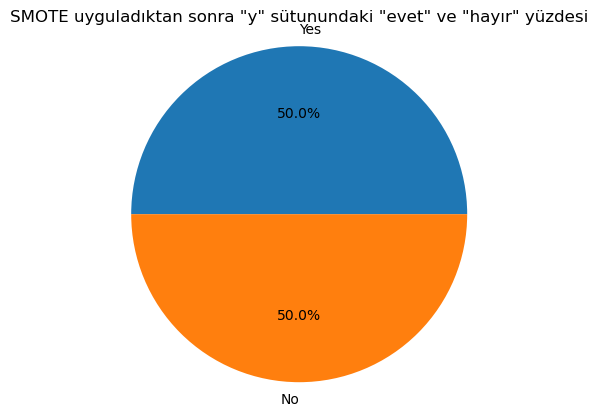

In [82]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (resampled_data['y'] == "yes").sum()
no_count = (resampled_data['y'] == "no").sum()

# Calculate the total count of values in the 'y' column
total_count = len(resampled_data)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("After sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)


# Create a pie chart
labels = ['Yes', 'No']
sizes = [percentage_yes, percentage_no]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('SMOTE uyguladıktan sonra "y" sütunundaki "evet" ve "hayır" yüzdesi')
plt.show()

# Training The Model

In [83]:
# Separate features (X) and the target variable (y) from the resampled data
X_resampled = resampled_data.drop('y', axis=1)
y_resampled = resampled_data['y']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [65]:
rf_clf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':[5,10,15],
    'max_features': ['sqrt',0.5,0.7],                
    'min_samples_split': [3,5,7], 
}

In [70]:
rf_clf_cv = GridSearchCV(rf_clf,param_grid=rf_param_grid,cv=3)
rf_clf_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 0.5, 0.7],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [67]:
rf_clf_cv.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

In [68]:
print('='*100)
print('Test Hatası')
print('='*100)
y_pred = rf_clf_cv.predict(X_test)
print(classification_report(y_test,y_pred))
print('='*100)
print('Train Hatası (Ezber Kontrolü)')
print('='*100)
y_pred_tr= rf_clf_cv.predict(X_train)
print(classification_report(y_train,y_pred_tr))

Test Hatası
              precision    recall  f1-score   support

          no       0.96      0.92      0.94      7084
         yes       0.93      0.96      0.95      7105

    accuracy                           0.94     14189
   macro avg       0.94      0.94      0.94     14189
weighted avg       0.94      0.94      0.94     14189

Train Hatası (Ezber Kontrolü)
              precision    recall  f1-score   support

          no       0.98      0.96      0.97     16563
         yes       0.96      0.98      0.97     16542

    accuracy                           0.97     33105
   macro avg       0.97      0.97      0.97     33105
weighted avg       0.97      0.97      0.97     33105




Confusion Matrix for Test Set:
[[6551  533]
 [ 261 6844]]


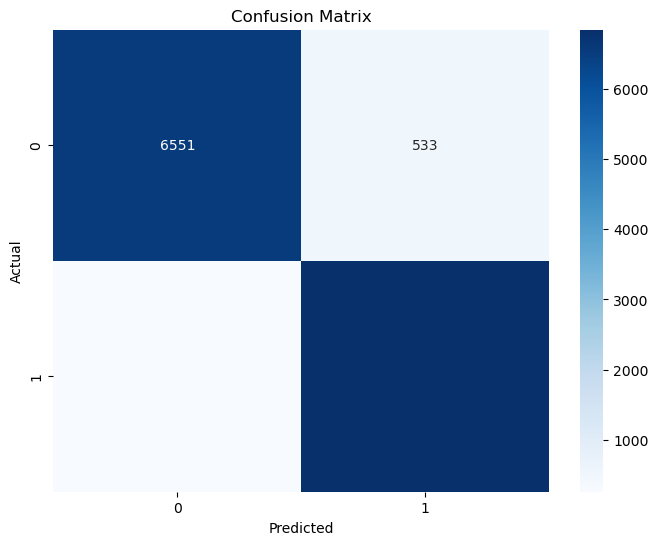

In [72]:
# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
log_reg = LogisticRegression()
params = {'penalty':['l1','l2','elasticnet'],
          'C':[10],
          'max_iter':[200]}

In [85]:
# Çapraz doğrulama yöntemi ile en iyi parametrelerin seçimi
log_reg_cv = GridSearchCV(log_reg,param_grid=params,scoring='accuracy', cv=5, verbose=3)
log_reg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ......C=10, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ....C=10, max_iter=200, penalty=l2;, score=0.837 total time=   0.0s
[CV 2/5] END ....C=10, max_iter=200, penalty=l2;, score=0.845 total time=   0.0s
[CV 3/5] END ....C=10, max_iter=200, penalty=l2;, score=0.832 total time=   0.0s
[CV 4/5] END ....C=10, max_iter=200, penalty=l2;, score=0.841 total time=   0.0s
[CV 5/5] END ....C=10, max_iter=200, penalty=l2;, score=0.838 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=elasti

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10], 'max_iter': [200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [86]:
log_reg_cv.best_params_

{'C': 10, 'max_iter': 200, 'penalty': 'l2'}

In [87]:
print('='*100)
print('Test Hatası')
print('='*100)
y_pred = log_reg_cv.predict(X_test)
print(classification_report(y_test,y_pred))
print('='*100)
print('Train Hatası (Ezber Kontrolü)')
print('='*100)
y_pred_tr= log_reg_cv.predict(X_train)
print(classification_report(y_train,y_pred_tr))

Test Hatası
              precision    recall  f1-score   support

          no       0.85      0.82      0.84      7084
         yes       0.83      0.85      0.84      7105

    accuracy                           0.84     14189
   macro avg       0.84      0.84      0.84     14189
weighted avg       0.84      0.84      0.84     14189

Train Hatası (Ezber Kontrolü)
              precision    recall  f1-score   support

          no       0.85      0.83      0.84     16563
         yes       0.83      0.85      0.84     16542

    accuracy                           0.84     33105
   macro avg       0.84      0.84      0.84     33105
weighted avg       0.84      0.84      0.84     33105




Confusion Matrix for Test Set:
[[5843 1241]
 [1035 6070]]


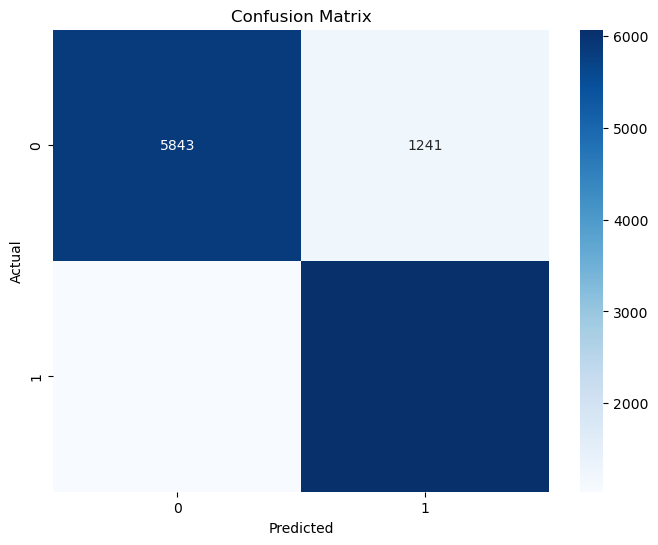

In [88]:
# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [89]:
dtree_clf = DecisionTreeClassifier()
dtree_clf_params = {
    'max_depth': [12]
}

In [90]:
dtree_clf_cv = GridSearchCV(dtree_clf,param_grid=dtree_clf_params,cv=5,verbose=3)
dtree_clf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......................max_depth=12;, score=0.893 total time=   0.1s
[CV 2/5] END ......................max_depth=12;, score=0.901 total time=   0.1s
[CV 3/5] END ......................max_depth=12;, score=0.895 total time=   0.1s
[CV 4/5] END ......................max_depth=12;, score=0.892 total time=   0.1s
[CV 5/5] END ......................max_depth=12;, score=0.893 total time=   0.1s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [12]}, verbose=3)

In [91]:
dtree_clf_cv.best_params_

{'max_depth': 12}

In [92]:
print('='*100)
print('Test Hatası')
print('='*100)
y_pred = dtree_clf_cv.predict(X_test)
print(classification_report(y_test,y_pred))
print('='*100)
print('Train Hatası (Ezber Kontrolü)')
print('='*100)
y_pred_tr= dtree_clf_cv.predict(X_train)
print(classification_report(y_train,y_pred_tr))

Test Hatası
              precision    recall  f1-score   support

          no       0.92      0.87      0.90      7084
         yes       0.88      0.92      0.90      7105

    accuracy                           0.90     14189
   macro avg       0.90      0.90      0.90     14189
weighted avg       0.90      0.90      0.90     14189

Train Hatası (Ezber Kontrolü)
              precision    recall  f1-score   support

          no       0.94      0.91      0.93     16563
         yes       0.91      0.95      0.93     16542

    accuracy                           0.93     33105
   macro avg       0.93      0.93      0.93     33105
weighted avg       0.93      0.93      0.93     33105

